# Regression Analysis to Predict Energy Output of a Combined Cycle Power Plant (CCPP) from its Operating Conditions

### __Description of Dataset:__

The dataset is from the UI ML repository [1]. It contains 36733 data points obtained from 11 gas turbine (GT) sensors in a power plant in Turkey. Features consist of hourly average GT operational data: ambient Temperature (AT), Ambient Pressure (AP), Relative Humidity (AH), and 6 other recorded variables (AFDP, GTEP, TIT, TAT, TEY, CDP) characterizing the properties of the emitted flue gas from the plant. These features will be used to predict the concentrations of both CO and NOx in the flue gas emitted by the GT.


### __Objective:__
To build an __Empirical Regression Model__ predicting CO and NOx concentration from the flue gas emission __(2 dependent var)__ given the recorded operating conditions and flue gas property measurements __(9 independent vars)__. For simplicity, CO and NOX concentration in flue gas are assumed to be independent to each other, hence will be regressed independently in this exercise. Theoretically, this may not be the case since both are products of combustion reaction in GT.  

### __Feature Information:__
- Variable (Abbr.) Unit Min Max Mean
- Ambient temperature (AT) C â€“6.23 37.10 17.71
- Ambient pressure (AP) mbar 985.85 1036.56 1013.07
- Ambient humidity (AH) (%) 24.08 100.20 77.87
- Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
- Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
- Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
- Turbine after temperature (TAT) C 511.04 550.61 546.16
- Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
- Turbine energy yield (TEY) MWH 100.02 179.50 133.51
- Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
- Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

## 1. Import Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

ranstate = 4321
file1 = 'https://raw.githubusercontent.com/nick-l33/ML-sklearn/main/Datasets/UCI%20ML%20Repo%20datasets/Emission/gt_2011.csv' 
file2 = 'https://raw.githubusercontent.com/nick-l33/ML-sklearn/main/Datasets/UCI%20ML%20Repo%20datasets/Emission/gt_2012.csv' 
file3 = 'https://raw.githubusercontent.com/nick-l33/ML-sklearn/main/Datasets/UCI%20ML%20Repo%20datasets/Emission/gt_2013.csv' 
file4 = 'https://raw.githubusercontent.com/nick-l33/ML-sklearn/main/Datasets/UCI%20ML%20Repo%20datasets/Emission/gt_2014.csv' 
file5 = 'https://raw.githubusercontent.com/nick-l33/ML-sklearn/main/Datasets/UCI%20ML%20Repo%20datasets/Emission/gt_2015.csv' 
collections = [pd.read_csv(file1), pd.read_csv(file2), pd.read_csv(file3), pd.read_csv(file4), pd.read_csv(file5)]
df = pd.DataFrame()
for elem in collections:
    df = pd.concat([df,elem], axis=0, ignore_index=True)

print('number of NaN+Null: ', (df.isnull().sum() + df.isna().sum()) )
df.sample(5)

number of NaN+Null:  AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
28283,21.4770,1015.4,72.328,4.5471,24.841,1078.8,549.59,129.01,11.890,1.77750,56.941
13044,22.4040,1016.2,90.835,4.6533,26.691,1097.1,549.92,139.09,12.448,0.85292,63.642
17097,19.2370,1005.2,76.633,2.6618,19.772,1055.4,549.97,109.44,10.510,5.02750,61.494
6468,9.9901,1028.0,82.360,3.7847,22.967,1082.4,550.10,131.72,11.745,1.70140,77.339
36265,11.8330,1028.7,47.585,4.2190,30.661,1097.0,537.13,154.58,13.616,9.57470,62.305


In [2]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


## 2. Normalize Dataset Then Split to Training and Test Datasets

In [3]:
# normalize
X = df.copy()

for i in range(len(X.columns)):
    X[X.columns[i]] = minmax_scale(X[X.columns[i]])
X.sample(10)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
5221,0.611655,0.440394,0.830690,0.193221,0.097054,0.579421,0.983068,0.147710,0.131934,0.044887,0.326046
27789,0.562760,0.548768,0.930395,0.448092,0.352420,0.836164,0.983826,0.437846,0.433411,0.036542,0.342982
6133,0.510935,0.763547,0.526020,0.504363,0.585672,0.990010,0.480920,0.721565,0.774269,0.026110,0.439668
26690,0.845954,0.367488,0.500847,0.393105,0.351899,0.807193,0.980035,0.356316,0.410612,0.040581,0.281974
4461,0.745742,0.556650,0.617513,0.423052,0.546572,0.996004,0.702805,0.607448,0.663099,0.009346,0.299367
30182,0.176746,0.663054,0.606845,0.126611,0.142193,0.600400,0.987870,0.253900,0.200143,0.095035,0.627764
4002,0.889473,0.483744,0.201117,0.461490,0.590885,0.994006,0.634572,0.646200,0.709263,0.006045,0.327397
34098,0.648459,0.562562,0.569454,0.127082,0.002737,0.378621,0.979277,0.002265,0.024401,0.162911,0.365927
10967,0.835617,0.466010,0.446745,0.396383,0.368798,0.919081,0.976497,0.412808,0.444528,0.034381,0.395617
10126,0.655682,0.542857,0.661985,0.508564,0.568034,0.991009,0.629012,0.665325,0.684956,0.029495,0.424052


In [4]:
# create feature matrix
y1 = pd.DataFrame()
y1['CO'] = X['CO']
y2 = pd.DataFrame()
y2['NOX'] = X['NOX']
X = X.drop(['CO','NOX'], axis=1)

In [5]:
# split training and test datasets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.7, random_state=ranstate, shuffle=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, train_size=0.7, random_state=ranstate, shuffle=True)

## 3. Build Regression Models
### 3.1. Check Feature Correlations

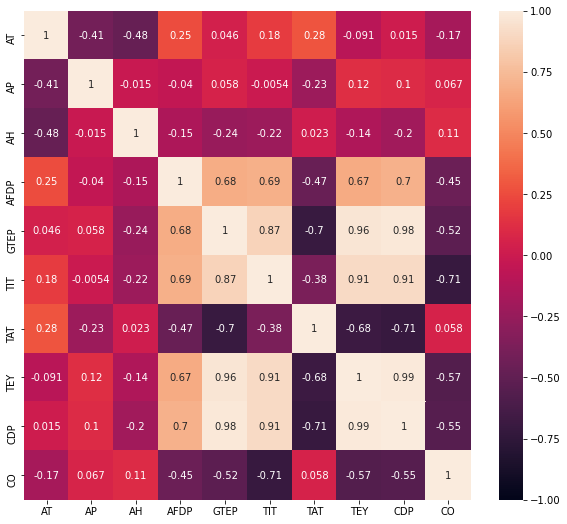

In [6]:
# Check correlation features of variables to CO emission
dfa = df.drop('NOX', axis=1)
corr_matrix1 = dfa.corr() 
plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix1, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

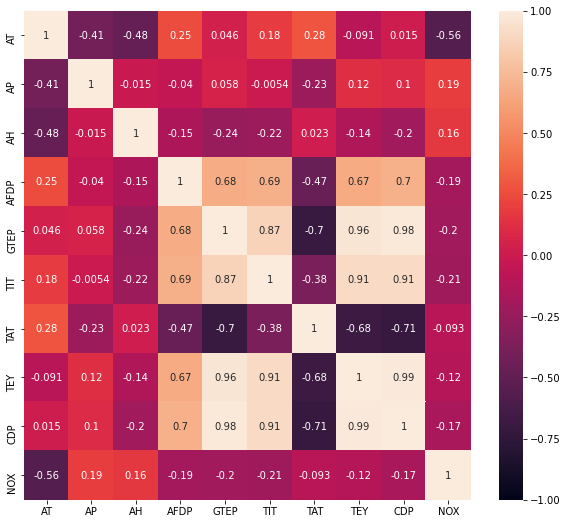

In [7]:
# Check correlation features of variables to CO emission
dfb = df.drop('CO', axis=1)
corr_matrix2 = dfb.corr() 
plt.figure(figsize=(10,9))
sns.heatmap(corr_matrix2, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

### 3.2. Import Regression Models and Fit Training Dataset

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error

### 3.2.1. Prediction Model for CO Emission

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Instantiate the regressors and make a list
regressors = [LinearRegression(), 
               SGDRegressor(), 
               RandomForestRegressor(random_state=ranstate), 
               XGBRegressor(random_state=ranstate, n_jobs=-1)]

# Train and get model metrics
lm = regressors[0].fit(X1_train, y1_train)
y1_predLM = lm.predict(X1_test)
print('R^2 Linear Regressor: ', r2_score(y1_test, y1_predLM) )
print('MSE Linear Regressor: ', mean_squared_error(y1_test, y1_predLM), '\n' )

sgdm = regressors[1].fit(X1_train, y1_train)
y1_predSGD = sgdm.predict(X1_test)
print('R^2 Stoc Grad Desc Regressor: ', r2_score(y1_test, y1_predSGD) )
print('MSE Stoc Grad Desc Regressor: ', mean_squared_error(y1_test, y1_predSGD), '\n' )

rfm = regressors[2].fit(X1_train, y1_train)
y1_predRF = rfm.predict(X1_test)
print('R^2 Random Forest Regressor: ', r2_score(y1_test, y1_predRF) )
print('MSE Random Forest Regressor: ', mean_squared_error(y1_test, y1_predRF), '\n' )

xgbm = regressors[3].fit(X1_train, y1_train) 
y1_predXGB = xgbm.predict(X1_test)
print('R^2 XGBoost Regressor: ', r2_score(y1_test, y1_predXGB) )
print('MSE XGBoost Regressor: ', mean_squared_error(y1_test, y1_predXGB) )


R^2 Linear Regressor:  0.566387750054222
MSE Linear Regressor:  0.0011204017223825837 

R^2 Stoc Grad Desc Regressor:  0.48340652984970056
MSE Stoc Grad Desc Regressor:  0.001334815180614403 

R^2 Random Forest Regressor:  0.7659291601971374
MSE Random Forest Regressor:  0.0006048108006806985 

R^2 XGBoost Regressor:  0.7428176745769319
MSE XGBoost Regressor:  0.0006645280902612777


### 3.2.2. Prediction Model for NOX

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Training and get the model matrix
lm = regressors[0].fit(X2_train, y2_train)
y2_predLM = lm.predict(X2_test)
print('R^2 Linear Regressor: ', r2_score(y2_test, y2_predLM) )
print('MSE Linear Regressor: ', mean_squared_error(y2_test, y2_predLM), '\n' )

sgdm = regressors[1].fit(X2_train, y2_train)
y2_predSGD = sgdm.predict(X2_test)
print('R^2 Stoc Grad Desc Regressor: ', r2_score(y2_test, y2_predSGD) )
print('MSE Stoc Grad Desc Regressor: ', mean_squared_error(y2_test, y2_predSGD), '\n' )

rfm = regressors[2].fit(X2_train, y2_train)
y2_predRF = rfm.predict(X2_test)
print('R^2 Random Forest Regressor: ', r2_score(y2_test, y2_predRF) )
print('MSE Random Forest Regressor: ', mean_squared_error(y2_test, y2_predRF), '\n' )

xgbm = regressors[3].fit(X2_train, y2_train) 
y2_predXGB = xgbm.predict(X2_test)
print('R^2 XGBoost Regressor: ', r2_score(y2_test, y2_predXGB) )
print('MSE XGBoost Regressor: ', mean_squared_error(y2_test, y2_predXGB) )


R^2 Linear Regressor:  0.5217376341618701
MSE Linear Regressor:  0.0074692477275770126 

R^2 Stoc Grad Desc Regressor:  0.2732228148168284
MSE Stoc Grad Desc Regressor:  0.011350420243439175 

R^2 Random Forest Regressor:  0.8755045845163183
MSE Random Forest Regressor:  0.0019443033063361924 

R^2 XGBoost Regressor:  0.8601645599886559
MSE XGBoost Regressor:  0.0021838756656277817


## 4. Tune Hyperparameters of RF and XGBoost Regressors Using GridSearchSV

In [11]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

search_space = {"2":{"n_estimators":[100,200],
                     "max_depth" :[3,6],
                     "criterion": ['squared_error','friedman_mse','poisson']},
               
                "3":{"n_estimators":[100,200],
                     "max_depth" :[3,6],
                     "learning_rate": [0.1, 0.05],
                     "booster": ['gbtree','gblinear','dart'] }     
               }                                                             

### 4.1. Random Forest Regressor for CO Emission (y1)

In [12]:
# change search_space indices with the model number accordingly to tune selected model
GSobj = GridSearchCV(estimator = regressors[2],
                    param_grid = search_space['2'],
                    scoring =['r2'],
                    refit = 'r2',
                    n_jobs=-1,
                    cv = 5, 
                    verbose = 4)

In [13]:
# import warnings
# warnings.filterwarnings('ignore')

# start tuning.....
GSobj.fit(X1_train, y1_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4321),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [3, 6], 'n_estimators': [100, 200]},
             refit='r2', scoring=['r2'], verbose=4)

In [14]:
optim_rfm = regressors[2].fit(X1_train, y1_train)
y1_predRF = optim_rfm.predict(X1_test)
print('R^2 Random Forest Regressor: ', r2_score(y1_test, y1_predRF) )
print('MSE Random Forest Regressor: ', mean_squared_error(y1_test, y1_predRF) )
print(GSobj.best_score_)
print(GSobj.best_params_)

R^2 Random Forest Regressor:  0.7659291601971374
MSE Random Forest Regressor:  0.0006048108006806985
0.7171333872648362
{'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 200}


### 4.2. Random Forest Regressor for NOX Emission (y2)

In [15]:
# import warnings
# warnings.filterwarnings('ignore')

# start tuning.....
GSobj.fit(X2_train, y2_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4321),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'poisson'],
                         'max_depth': [3, 6], 'n_estimators': [100, 200]},
             refit='r2', scoring=['r2'], verbose=4)

In [16]:
optim_rfm = regressors[2].fit(X2_train, y2_train)
y2_predRF = optim_rfm.predict(X2_test)
print('R^2 Random Forest Regressor: ', r2_score(y2_test, y2_predRF) )
print('MSE Random Forest Regressor: ', mean_squared_error(y2_test, y2_predRF) )
print(GSobj.best_score_)
print(GSobj.best_params_)

R^2 Random Forest Regressor:  0.8755045845163183
MSE Random Forest Regressor:  0.0019443033063361924
0.7077259980218276
{'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 100}


### 4.3. XGBoost Regressor for CO Emission (y1)

In [17]:
# change search_space indices with the model number accordingly to tune selected model
GSobj = GridSearchCV(estimator = regressors[3],
                    param_grid = search_space['3'],
                    scoring =['r2'],
                    refit = 'r2',
                    n_jobs=-1,
                    cv = 5, 
                    verbose = 4)

In [18]:
# import warnings
# warnings.filterwarnings('ignore')

# start tuning.....
GSobj.fit(X1_train, y1_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=1, random_state=4321,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.05], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             refit='r2', scoring=['r2'], verbose=4)

In [19]:
optim_xgbm = regressors[3].fit(X1_train, y1_train) 
y1_predXGB = optim_xgbm.predict(X1_test)
print('R^2 XGBoost Regressor: ', r2_score(y1_test, y1_predXGB) )
print('MSE XGBoost Regressor: ', mean_squared_error(y1_test, y1_predXGB) )
print(GSobj.best_score_)
print(GSobj.best_params_)

R^2 XGBoost Regressor:  0.7428176745769319
MSE XGBoost Regressor:  0.0006645280902612777
0.7505140226560207
{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


### 4.4. XGBoost Regressor for NOX Emission (y2)

In [20]:
# import warnings
# warnings.filterwarnings('ignore')

# start tuning.....
GSobj.fit(X2_train, y2_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=-1,
                                    num_parallel_tree=1, random_state=4321,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'learning_rate': [0.1, 0.05], 'max_depth': [3, 6],
                         'n_estimators': [100, 200]},
             refit='r2', scoring=['r2'], verbose=4)

In [21]:
optim_xgbm = regressors[3].fit(X2_train, y2_train) 
y2_predXGB = optim_xgbm.predict(X2_test)
print('R^2 XGBoost Regressor: ', r2_score(y2_test, y2_predXGB) )
print('MSE XGBoost Regressor: ', mean_squared_error(y2_test, y2_predXGB) )
print(GSobj.best_score_)
print(GSobj.best_params_)

R^2 XGBoost Regressor:  0.8601645599886559
MSE XGBoost Regressor:  0.0021838756656277817
0.8458009598111438
{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


__Observation__:
Default hyperparameters of models tested herein are generally close to optimum for this problem, hence the best hyperparameters combination obtained from the gridsearchcv tuning were almost sub-optimal to the default values.

# References:
1. https://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set
2. https://www.power-eng.com/emissions/progress-continuesin-gas-turbine-nox-control/#gref